In [2]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from vega_datasets import data

Resample by the day and take the average temperature. Visualize the average temperature over time.

Write the code necessary to visualize the minimum temperature over time.

Write the code necessary to visualize the maximum temperature over time.

Which month is the coldest, on average?

Which month has the highest average temperature?

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 

Use this resampled dataframe to calculate the change in temperature for the day. 

Which month has the highest daily temperature variability?

In [3]:
temps = data.sf_temps()

In [4]:
# look at how much data there is
# looks like 'date' needs to be set as the index
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# reset index to the date time object
temps = temps.set_index('date').sort_index()

In [6]:
# resample by day and take average temp
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


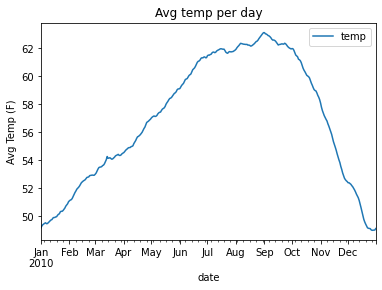

In [7]:
# visualize avg temp
temps.resample('D').mean().plot()
plt.title('Avg temp per day')
plt.ylabel('Avg Temp (F)')
plt.show()

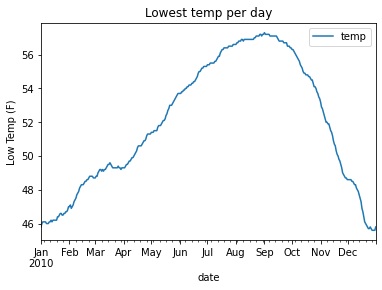

In [8]:
# visualize minimum temp over time (using Days)
temps.resample('D').min().plot()
plt.title('Lowest temp per day')
plt.ylabel('Low Temp (F)')
plt.show()

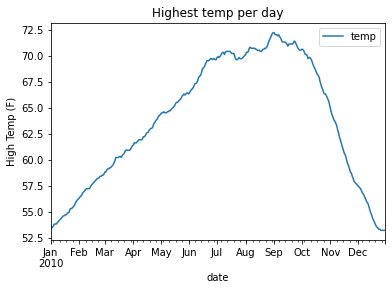

In [9]:
# visualize max temp over time
temps.resample('D').max().plot()
plt.title('Highest temp per day')
plt.ylabel('High Temp (F)')
plt.show()

In [10]:
# find coldest month on average - January 
# (there's only data from 2010)
temps.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


In [11]:
# find hottest month on average - September
temps.resample('M').mean().sort_values(by='temp', ascending= False).head(1)

,temp
date,
2010-09-30,62.487083


In [12]:

# Resample by the day and calculate the min and max temp for the day 
# (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.
# Which month has the highest daily temperature variability?

min_max_temps = temps.resample('D').agg(['min', 'max'])

min_max_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (temp, min)  365 non-null    float64
 1   (temp, max)  365 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [13]:
# need to rename columns temp,min and temp, max
min_max_temps.columns = ["_".join(x) for x in min_max_temps.columns.ravel()]

<ipython-input-13-59a2145431db>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  min_max_temps.columns = ["_".join(x) for x in min_max_temps.columns.ravel()]


In [14]:
# look at new column names
min_max_temps.head()

,temp_min,temp_max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [15]:
# create new column name 
min_max_temps['difference'] = min_max_temps['temp_max'] - min_max_temps['temp_min']

In [16]:
# resample by month and sort the values
min_max_temps.resample('M').mean().difference.sort_values(ascending = False).head(1)

# Month with highest varience is September

date
2010-09-30    14.403333
Name: difference, dtype: float64

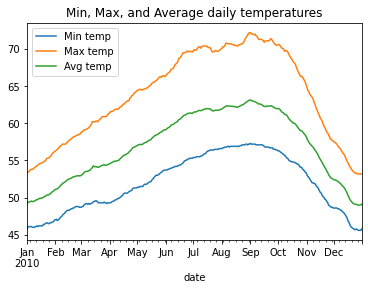

In [17]:
# # Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
# i.e. the min, average, and maximum temperature should be 3 seperate lines.

temps.resample('D').min().temp.plot(label = 'Min temp')
temps.resample('D').max().temp.plot(label = 'Max temp')
temps.resample('D').mean().temp.plot(label = 'Avg temp')
plt.legend()
plt.title('Min, Max, and Average daily temperatures')
plt.show()

Use the dataset to answer the following questions:

Which year and month combination has the highest amount of precipitation?

Visualize the amount of monthly precipitation over time.

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

In [18]:
# get dataframe
weather = data.seattle_weather()

In [19]:
# look at data
# looks like 'date' is already a datetime object but needs to be set as index
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [20]:
weather.date.min(), weather.date.max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2015-12-31 00:00:00'))


Data info
Looks like dates go from January 2012, to December 2015

covers 4 full years

appears to be daily observations

doesn't appear to have time in the timestamp

date needs to be set as index

This data is taken from NOAA. It has columns for the following:

temperature (in Celsius)

precipitation (in millimeters)

wind speed (in meter/second)

weather type

In [21]:
# set index to date
weather = weather.set_index('date').sort_index()

In [22]:
# which year and month has highest precipitation
weather.resample('M').sum().sort_values(by='precipitation', ascending=False).head(1)

# DECEMBER of 2015 has the highest precipitation
# they must have gotten a lot of snow that year

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


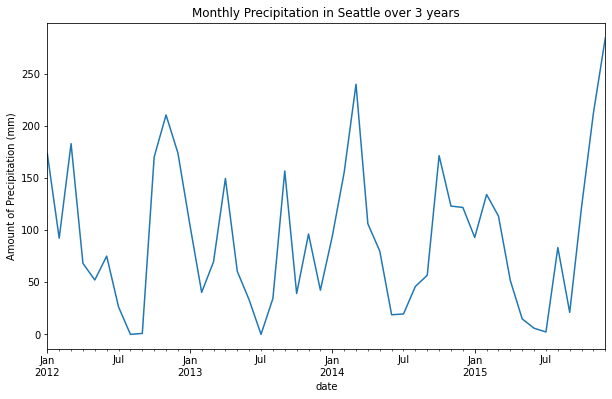

In [23]:

# visualize monthly precipitation

plt.figure(figsize= (10,6))
weather.resample('M').sum().precipitation.plot(label = 'sum of monthly precipitation')
plt.title("Monthly Precipitation in Seattle over 3 years")
plt.ylabel('Amount of Precipitation (mm)')
plt.show()

In [24]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


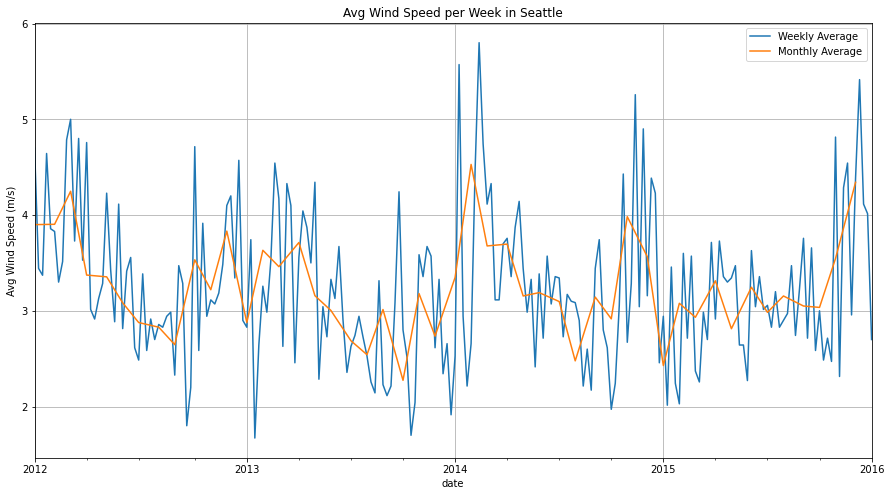

In [25]:
# visualize avg wind speed over time
# choose interval - Weekly 

plt.figure(figsize = (15,8))
weather.resample('1W').mean().wind.plot(label = 'Weekly Average')
weather.resample('M').mean().wind.plot(label = 'Monthly Average')
plt.ylabel('Avg Wind Speed (m/s)')
plt.title('Avg Wind Speed per Week in Seattle')
plt.grid()
plt.legend()
plt.show()

In [26]:
# Which year-month combination is the windiest? on average
# February of 2014 was the windiest on average 
# avg wind speed of 4.52 meters per second

weather.resample('M').mean().sort_values(by= 'wind', ascending= False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


In [27]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
weather.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [28]:
# create mask of dataframe with only days that had sun
# resampled by year and used aggregate function count
# 2014 was the sunniest year. had 211 days of sun
# which is a lot higher than I would have expected from Seattle

weather[weather.weather == 'sun'].resample('Y').agg('count')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


In [29]:

# In which month does it rain the most?
# same approach as above cept with rain

# 2012 was the rainiest year by far. with 191 days of rain

weather[weather.weather == 'rain'].resample("Y").agg('count')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,191,191,191,191,191
2013-12-31,60,60,60,60,60
2014-12-31,3,3,3,3,3
2015-12-31,5,5,5,5,5


In [30]:
weather[weather.precipitation > 0].resample('M').agg('count').sort_values(by = 'precipitation', ascending = False).head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,27,27,27,27,27
2015-12-31,25,25,25,25,25
2012-01-31,22,22,22,22,22
2012-03-31,22,22,22,22,22
2015-11-30,20,20,20,20,20


Flights
data.flights_20k()
Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?

In [31]:
# get flights dataframe and set_index to date colun
flights = data.flights_20k().set_index('date')

In [32]:
# look at dataframe
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


In [33]:
# Convert any negative delays to 0.

# see how many have negative delays. 8482

(flights.delay < 0 ).value_counts()

False    11518
True      8482
Name: delay, dtype: int64

In [34]:
# clip should take care of all the values lower than 0 and turn them to 0
flights['delay'].clip(lower=0).head()

date
2001-01-13 14:56:00    32
2001-01-31 16:40:00     0
2001-02-11 18:39:00     3
2001-01-10 21:00:00     0
2001-03-30 21:45:00     0
Name: delay, dtype: int64

In [35]:
# assign clipped series to delay column
flights['delay'] = flights['delay'].clip(lower=0)

In [36]:
# Does the day of the week make a difference in the delay amount?
# - yes it does, Friday has the most delays and Saturday the least

# add column of day to dataframe
flights['day'] = flights.index.day_name()

In [37]:
# use groupby with new column and sum up the delayed minutes
flights.groupby('day').agg('sum')['delay'].sort_values()

day
Saturday     19755
Monday       21354
Sunday       27221
Tuesday      27715
Wednesday    33969
Thursday     38605
Friday       53770
Name: delay, dtype: int64

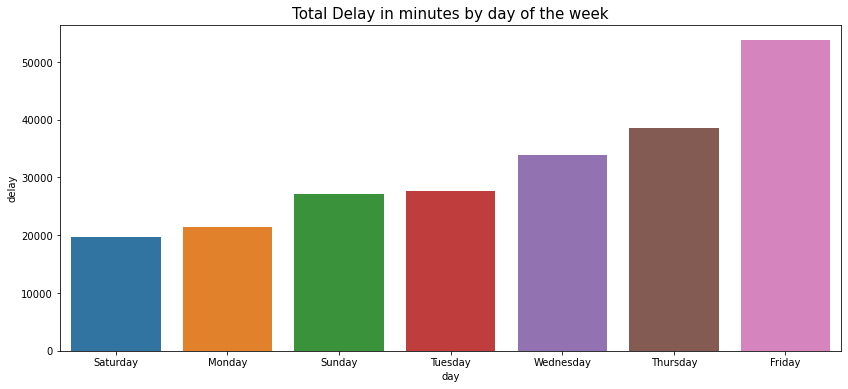

In [38]:
# create df of counts and reset the index to make it easier to plot
delay_counts = flights.groupby('day').agg('sum')['delay'].sort_values().reset_index()

# use seaborn plotting to plot the delay 
plt.figure(figsize = (14,6))
sns.barplot(data = delay_counts, y = 'delay', x = 'day')
plt.title('Total Delay in minutes by day of the week', fontsize = 15)
plt.show()

In [39]:
# Does the month make a difference in the delay amount?

# get column with month 
flights['month'] = flights.index.month

In [40]:
# see how many months are represented in the data
flights.month.value_counts()

# looks like only 3, January Feb and March

3    6960
1    6784
2    6256
Name: month, dtype: int64

In [41]:
# use groupby to aggregate the delay minutes together
flights.groupby('month').delay.agg('sum')

month
1    76670
2    76987
3    68732
Name: delay, dtype: int64

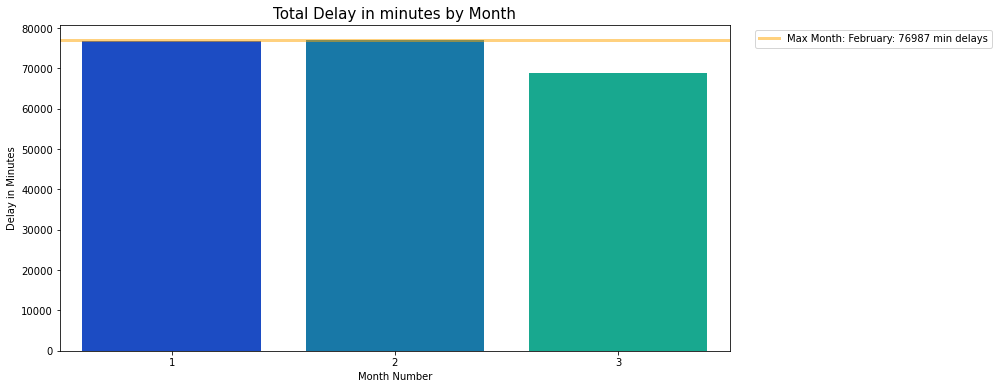

In [42]:
# assign to variable
delays_month = flights.groupby('month').delay.agg('sum').reset_index()

#plot month frequencies
plt.figure(figsize = (12,6))
sns.barplot(data=delays_month, x = 'month', y = 'delay', palette='winter')
plt.axhline(delays_month.delay.max(), c = 'orange', lw = 3, alpha = 0.5, 
            label = "Max Month: February: 76987 min delays")
plt.title('Total Delay in minutes by Month', fontsize = 15)
plt.legend(bbox_to_anchor= (1.03, 1) )
plt.xlabel("Month Number")
plt.ylabel('Delay in Minutes')
plt.show()

February has the most delays in minutes, followed VERY closely by January. Due possibly to the cold weather. There is a significant drop off at month 3.

It is much more evident that days of the week have drastically different delay totals

I used the sum of minutes of delay. Could also look at the average delay time. Might need to undo the converting negatives to 0s thing